<a href="https://colab.research.google.com/github/julio-cesar-santos/classificacao_por_tras_dos_panos/blob/main/Projeto_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

#Importando os dados



In [ ]:
file_path = "Customer-Churn.csv"
data = pd.read_csv(file_path)
SEED = 42


Visualizando o formato dos dados
---



In [ ]:
data.shape

(7043, 18)

In [ ]:
data.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [ ]:
data.describe()

,Maior65Anos,MesesDeContrato,ContaMensal
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Pré-processando os dados:
> Utilizando a função Map para substituir os valores das Colunas que contenham ['Sim','Nao'] por [1,0]
>> Para transformar as variavéis categóricas em numéricas



In [ ]:
data_modified = data[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].map(lambda x : 1 if x == 'Sim'
                                                                                                 else 0 if x == 'Nao'
                                                                                                 else x)

Usando o get_dummies para criar novas colunas a cada categoria única encontrada
> Concatenando os DataFrames em um só

In [ ]:
dummie_data = pd.get_dummies(data.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], axis=1))
final_data = pd.concat([data_modified, dummie_data], axis=1)
final_data.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,False,True,...,True,False,False,False,True,False,False,True,False,False
1,0,0,1,0,0,0,34,56.95,True,False,...,True,False,False,False,False,True,False,False,True,False
2,0,0,1,1,1,0,2,53.85,True,False,...,True,False,False,False,True,False,False,False,True,False
3,0,0,0,0,0,0,45,42.30,False,True,...,True,False,False,False,False,True,False,False,False,True
4,0,0,1,1,1,0,2,70.70,True,False,...,True,False,False,False,True,False,False,True,False,False


In [ ]:
pd.set_option('display.max_columns', 39)
final_data.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False
1,0,0,1,0,0,0,34,56.95,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False
2,0,0,1,1,1,0,2,53.85,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False
3,0,0,0,0,0,0,45,42.30,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,False,True
4,0,0,1,1,1,0,2,70.70,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False


Visualização do gráfico da nossa coluna Churn
> Para identificar se há um balanceamento nos dados <br>
Podemos perceber que nossos dados não estão bem distribuídos <br>
Dado que nossa coluna Churn tem mais amostras 0 que 1

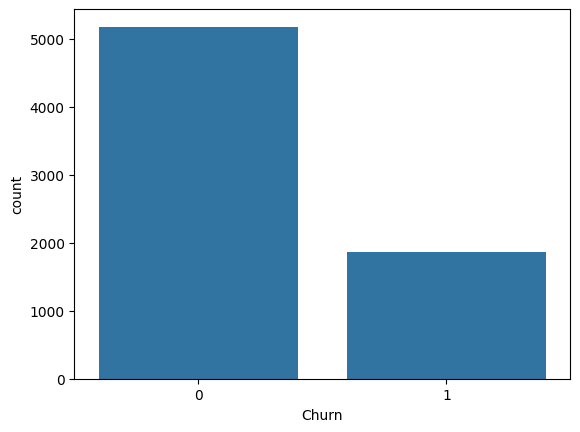

In [ ]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data=final_data)

Dividindo os dados
> X são os atributos das colunas a serem observadas para saber qual atributo tem mais importância na saída de um cliente <br>
Y resultado se o cliente continua ou não com nossa empresa

In [ ]:
X = final_data.drop('Churn', axis = 1)
y = final_data['Churn']

Utilizando o Smote
> Para criar amostrar sintéticas e adicionar na classe 1 <br>
Fazendo o balanceamento dos dados

In [ ]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=SEED)
X, y = smt.fit_resample(X, y)

In [ ]:
final_data = pd.concat([X,y], axis = 1)
final_data.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,0
1,0,0,1,0,0,34,56.95,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,0
2,0,0,1,1,0,2,53.85,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,1
3,0,0,0,0,0,45,42.30,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,False,True,0
4,0,0,1,1,0,2,70.70,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,1


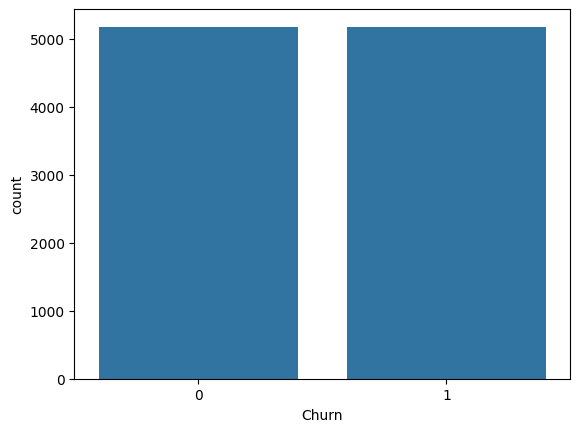

In [ ]:
ax = sns.countplot(x='Churn', data=final_data)

Padronizando escalas com StandarScaler
>Transformando Xmaria na mesma escala que o X_normalizado

In [ ]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_normalizado = scaler.fit_transform(X)
X_normalizado[0]

array([ 1.26568609, -0.52726104, -3.0591434 ,  0.81449258, -0.41318358,
       -1.10772865, -1.32175432, -0.99575697,  3.0591434 , -0.93540224,
        1.48315631, -1.05853285, -0.44850949,  0.77819389, -0.44850949,
       -0.59625062, -1.0970768 , -0.44850949,  1.3517849 ,  0.91935908,
       -0.44850949, -0.73991904,  0.78589647, -0.44850949, -0.60667885,
        1.08898545, -0.44850949, -0.84672335,  1.10610293, -0.44850949,
       -0.85770576, -0.4605816 ,  0.68807296, -0.47286547, -0.50805069,
        1.05361957, -0.54727528, -0.53130034])

In [ ]:
X_Maria_Normalizado = scaler.transform(pd.DataFrame(Xmaria, columns=X.columns))
X_Maria_Normalizado

array([[-0.79008532, -0.52726104,  0.32688889,  0.81449258, -0.41318358,
        -1.14939314, -0.97235197,  1.00426111, -0.32688889, -0.93540224,
        -0.67423777,  0.94470379, -0.44850949,  0.77819389, -0.44850949,
        -0.59625062, -1.0970768 , -0.44850949,  1.3517849 ,  0.91935908,
         2.22960721, -0.73991904, -1.27243223,  2.22960721, -0.60667885,
         1.08898545, -0.44850949, -0.84672335, -0.904075  , -0.44850949,
         1.16590099, -0.4605816 , -1.45333425,  2.1147664 , -0.50805069,
        -0.94910918, -0.54727528,  1.8821746 ]])

In [ ]:
a = X_Maria_Normalizado
b = X_normalizado[0]

Fazendo o cálculo da Distância Euclidiana manualmente <br>
image.png
>Entender com quais métricas o algoritmo KNN trabalha

In [ ]:
distancia_euclid = np.sqrt(np.sum(np.square(X_Maria_Normalizado - X_normalizado[0])))
distancia_euclid

np.float64(9.369215760213486)

Separação dos dados em treino e teste
> 80% dos dados para treinamento para que não aconteça um overfitting ou underfitting



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=SEED)

Testando os desempenhos de cada modelo
> Começando pelo KNN utilizando como parâmetros 5 vizinhos mais próximos para ser feito a classificação

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [ ]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
pred_knn = neigh.predict(X_test)

In [ ]:
pred_knn

array([1, 0, 1, ..., 1, 1, 1])

Usando algoritmo de bernoulli
>Passando como parâmetro a mediana do X_train

In [ ]:
median_X_train = np.median(X_train)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB(binarize= median_X_train)

In [ ]:
clf.fit(X_train, y_train)

BernoulliNB(binarize=np.float64(0.0))

In [ ]:
bnb_pred = clf.predict(X_test)

Utilizando do Algoritmo de Árvore de Decisão com o critério entropia, pois obteve um melhor resultado

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy", random_state=SEED)

In [ ]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
predict_dtc = dtc.predict(X_test)

Usando matriz de confusão para fazer uma análise dos dados
> Verdadeiro Positivo - Falso Positivo <br>
Falso negativo - Verdadeiro Negativo
>> Em todos os modelos

In [ ]:
from sklearn.metrics import confusion_matrix
matriz_knn = confusion_matrix(y_test, pred_knn)
matriz_knn

array([[746, 275],
       [ 88, 961]])

In [ ]:
matriz_bernoulli = confusion_matrix(y_test, bnb_pred)
matriz_bernoulli

array([[700, 321],
       [118, 931]])

In [ ]:
matriz_arvore = confusion_matrix(y_test, predict_dtc)
matriz_arvore

array([[839, 182],
       [190, 859]])

Validando os modelos <br>
Usando:


*   Taxa de Acurácia
>Analisa o desempenho geral do Modelo
*   Score de precisão
> A frequência com que o modelo prevê corretamente uma classe positiva
vp / (vp + fp)
*   Score de recall
> Métrica que mede a capacidade de um modelo prever classes positivas reais
vp / (vp + fn)






In [ ]:
from sklearn.metrics import accuracy_score
print(f'Acurácia do algoritmo KNN {accuracy_score(y_test, pred_knn) * 100:.2f}%')
print(f'Acurácia do algoritmo Bernoulli {accuracy_score(y_test, bnb_pred) * 100:.2f}%')
print(f'Acurácia do algoritmo de Árvore de Decisão {accuracy_score(y_test, predict_dtc) * 100:.2f}%')

Acurácia do algoritmo KNN 82.46%
Acurácia do algoritmo Bernoulli 78.79%
Acurácia do algoritmo de Árvore de Decisão 82.03%


In [ ]:
from sklearn.metrics import precision_score
print(f'Precisão do algoritmo KNN {precision_score(y_test, pred_knn) * 100:.2f}%')
print(f'Precisão do algoritmo Bernoulli {precision_score(y_test, bnb_pred) * 100:.2f}%')
print(f'Precisão do algoritmo de Árvore de Decisão {precision_score(y_test, predict_dtc) * 100:.2f}%')

Precisão do algoritmo KNN 77.75%
Precisão do algoritmo Bernoulli 74.36%
Precisão do algoritmo de Árvore de Decisão 82.52%


Melhor método será o recall_score
> O que a empresa deseja saber quais são os possíveis clientes a deixarem a empresa, com isso o desejável é saber com precisão quais serão os nossos potenciais consumidores a deixar nossa empresa
>> O algoritmo com o melhor resultado foi o algoritmo KNN

In [ ]:
from sklearn.metrics import recall_score
print(f'Recall score do algoritmo KNN {recall_score(y_test, pred_knn) * 100:.2f}%')
print(f'Recall Score do algoritmo Bernoulli {recall_score(y_test, bnb_pred) * 100:.2f}%')
print(f'Recall Score do algoritmo de Árvore de Decisão {recall_score(y_test, predict_dtc) * 100:.2f}%')

Recall score do algoritmo KNN 91.61%
Recall Score do algoritmo Bernoulli 88.75%
Recall Score do algoritmo de Árvore de Decisão 81.89%
